## Pycaret 2.1

In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.4MB/s 
     |████████████████████████████████| 276kB 6.4MB/s 
     |████████████████████████████████| 102kB 5.2MB/s 
     |████████████████████████████████| 174kB 9.6MB/s 
     |████████████████████████████████| 245kB 10.2MB/s 
     |████████████████████████████████| 65.8MB 60kB/s 
     |████████████████████████████████| 6.8MB 36.3MB/s 
     |████████████████████████████████| 157.5MB 73kB/s 
     |████████████████████████████████| 14.2MB 269kB/s 
     |████████████████████████████████| 1.8MB 34.9MB/s 
     |████████████████████████████████| 1.6MB 25.6MB/s 
     |████████████████████████████████| 2.1MB 34.7MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 3.1MB 41.0MB/s 
     |████████████████████████████████| 604kB 43.5MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 337kB 43.3MB/s 
   

In [ ]:
### Restart runtime

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/titanic2.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


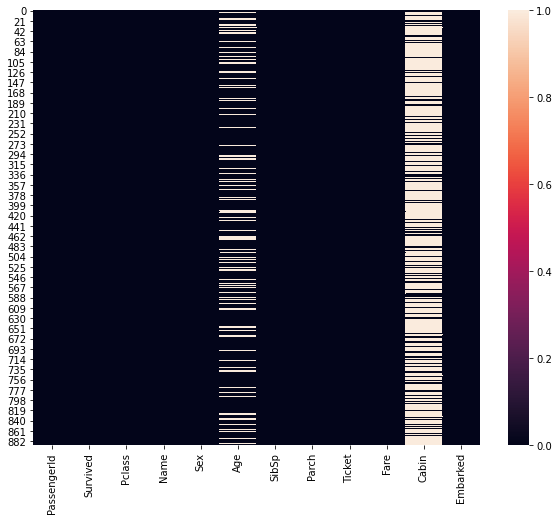

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull());

In [5]:
# Drop all rows with missin data
data = data.dropna()

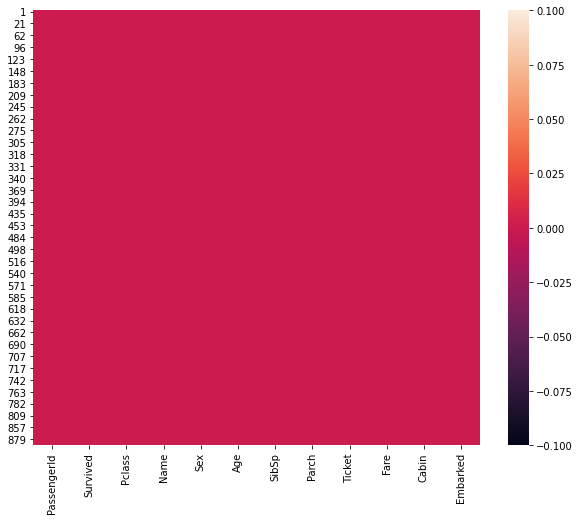

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull());

In [7]:
## Delete Ticket and PassengerId column
data.drop(['Ticket', 'PassengerId'], axis=1, inplace=True) 

## Make binary transformaion for column Sex 
gender_mapper = {'male': 0, 'female': 1} 
data['Sex'].replace(gender_mapper, inplace=True) 

# Put 1 on title unusual - Mr, Miss, Mrs,
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0]) 
data['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in data['Title']] 
data = data.rename(columns={'Title': 'Title_Unusual'}) 

## Delete column Name
data.drop('Name', axis=1, inplace=True) 

##Cabin_Known
data['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in data['Cabin']] 
data.drop('Cabin', axis=1, inplace=True) 

## Dummy variables for Embarked
emb_dummies = pd.get_dummies(data['Embarked'], drop_first=True, prefix='Embarked') 
data = pd.concat([data, emb_dummies], axis=1) 
data.drop('Embarked', axis=1, inplace=True) 

# To replace missing values with interpolated values, for example Age
data['Age'] = data['Age'].interpolate()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '_

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
6,0,1,0,54.0,0,0,51.8625,0,1,0,1
10,1,3,1,4.0,1,1,16.7000,0,1,0,1
11,1,1,1,58.0,0,0,26.5500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,1,47.0,1,1,52.5542,0,1,0,1
872,0,1,0,33.0,0,0,5.0000,0,1,0,1
879,1,1,1,56.0,0,1,83.1583,0,1,0,0
887,1,1,1,19.0,0,0,30.0000,0,1,0,1


In [9]:
import pycaret

In [10]:
from pycaret.classification import * 
clf = setup(data, target='Survived', session_id=667)

,Description,Value
0,session_id,667
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(183, 11)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=10, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Naive Bayes,0.7115,0.7410,0.8639,0.7662,0.7999,0.2645,0.2899,0.0052
1,Linear Discriminant Analysis,0.7494,0.8081,0.7556,0.8606,0.7968,0.4691,0.4914,0.0069
2,Ridge Classifier,0.7417,0.0000,0.7556,0.8499,0.7918,0.4511,0.4727,0.0077
3,Gradient Boosting Classifier,0.7167,0.7709,0.8014,0.7851,0.7886,0.3484,0.3632,0.0668
4,CatBoost Classifier,0.7013,0.7603,0.7903,0.7779,0.7769,0.3161,0.3421,1.0837
5,Ada Boost Classifier,0.6705,0.7503,0.8125,0.7300,0.7648,0.2106,0.2289,0.0795
6,Logistic Regression,0.6955,0.8112,0.7556,0.7991,0.7645,0.3195,0.3529,0.0309
7,Random Forest Classifier,0.6853,0.7569,0.7667,0.7735,0.7619,0.2837,0.3096,0.1129
8,Extreme Gradient Boosting,0.6776,0.7497,0.7778,0.7591,0.7617,0.2536,0.2761,0.0262
9,Extra Trees Classifier,0.6692,0.7564,0.7764,0.7419,0.7484,0.2429,0.2677,0.2409


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#It seems like Light Gradient Boosting approach did the best overall, so we can use it to create our model:

In [ ]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6154,0.8056,0.6667,0.7500,0.7059,0.1558,0.1581
1,0.6154,0.7222,0.6667,0.7500,0.7059,0.1558,0.1581
2,0.6154,0.7222,0.7778,0.7000,0.7368,0.0299,0.0304
3,0.6923,0.7500,0.7778,0.7778,0.7778,0.2778,0.2778
4,0.6923,0.7778,0.6667,0.8571,0.7500,0.3659,0.3858
5,0.6923,0.8889,0.8889,0.7273,0.8000,0.1613,0.1777
6,0.8462,0.8500,1.0000,0.8000,0.8889,0.6486,0.6928
7,0.6923,0.7375,0.7500,0.7500,0.7500,0.3500,0.3500
8,0.5000,0.4688,0.6250,0.6250,0.6250,-0.1250,-0.1250
9,0.5833,0.5469,0.5000,0.8000,0.6154,0.2105,0.2390


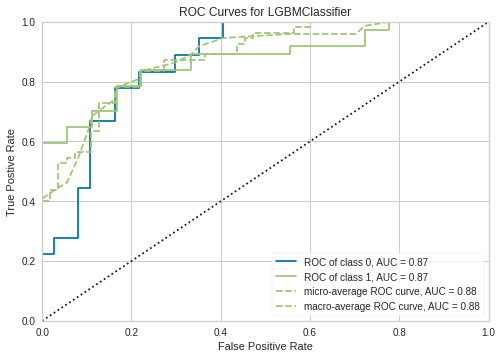

In [ ]:
plot_model(model)

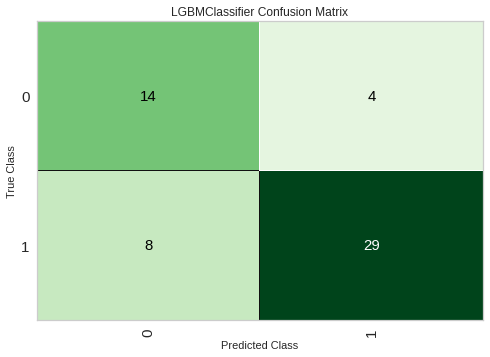

In [ ]:
plot_model(model, 'confusion_matrix')

In [ ]:
!pip install shap

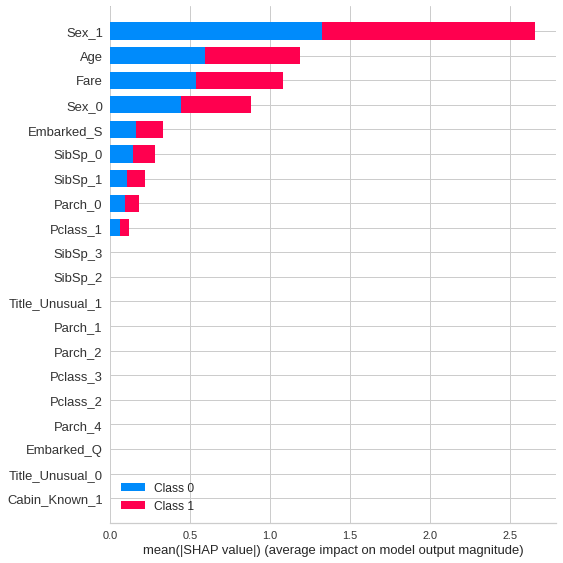

In [ ]:
interpret_model(model)

In [ ]:
# SHAP, or SHapley Additive exPlanations, is a way to explain the outputs of a machine learning model. 
# We can use it to see which features are most important by 
# plotting the SHAP values of every feature for every sample.

In [ ]:
predictions = predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7818,0.8724,0.7838,0.8788,0.8286,0.5312,0.5379


In [ ]:
finalize_model(model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=667, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
save_model(model, 'titanic_lgbm') #pkl

Transformation Pipeline and Model Succesfully Saved


## Diabets Dataset

In [ ]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#The first step of any machine learning experiment in PyCaret is setting up the environment by importing the required module and initializing setup( ). 
#The module used in this example is pycaret.classification.

In [ ]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,7379
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


All the preprocessing steps are applied within setup(). With over 20 features to prepare data for machine learning, PyCaret creates a transformation pipeline based on the parameters defined in setup function. It automatically orchestrates all dependencies in a pipeline so that you don’t have to manually manage the sequential execution of transformations on test or unseen dataset

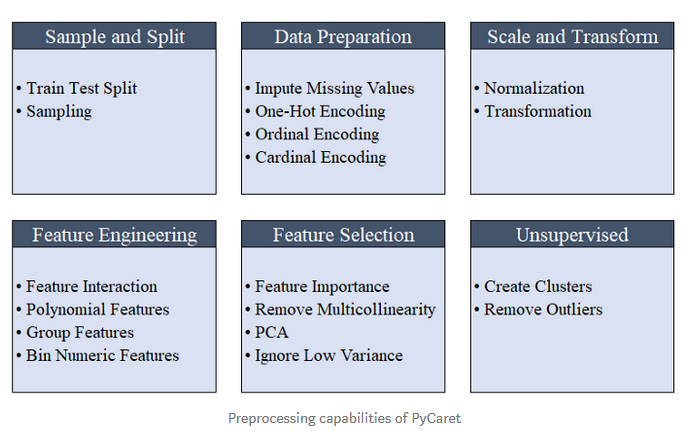

In [ ]:
from IPython.display import Image
Image('https://frenzy86.s3.eu-west-2.amazonaws.com/fav/pycaret1.PNG')

k-fold cross validation (by default 10 folds). The evaluation metrics used are:

    * For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa
    * For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.7653,0.8203,0.5348,0.7412,0.6118,0.4507,0.4695,0.0082
1,Extreme Gradient Boosting,0.7651,0.8218,0.6085,0.6949,0.6431,0.4698,0.4764,0.0542
2,Logistic Regression,0.7635,0.8146,0.5450,0.7328,0.6120,0.4487,0.4679,0.0435
3,CatBoost Classifier,0.7634,0.8201,0.5977,0.6948,0.6362,0.4631,0.4708,1.6198
4,Ridge Classifier,0.7616,0.0000,0.5295,0.7335,0.6057,0.4420,0.4604,0.0068
5,Gradient Boosting Classifier,0.7522,0.8143,0.5980,0.6716,0.6254,0.4423,0.4497,0.1468
6,Random Forest Classifier,0.7430,0.7739,0.4865,0.7068,0.5684,0.3941,0.4135,0.1135
7,Extra Trees Classifier,0.7359,0.7912,0.5307,0.6570,0.5823,0.3934,0.4010,0.2533
8,Light Gradient Boosting Machine,0.7317,0.8045,0.5655,0.6315,0.5934,0.3947,0.3982,0.0519
9,K Neighbors Classifier,0.7261,0.7513,0.5500,0.6317,0.5846,0.3818,0.3866,0.0065


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8586,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.8148,0.9383,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.6667,0.6925,0.5263,0.5263,0.5263,0.2692,0.2692
3,0.7037,0.7519,0.5789,0.5789,0.5789,0.3504,0.3504
4,0.6852,0.8256,0.4211,0.5714,0.4848,0.2656,0.2720
5,0.6852,0.7714,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7407,0.6782,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.6604,0.7016,0.3889,0.5000,0.4375,0.1997,0.2029
8,0.6604,0.7095,0.3333,0.5000,0.4000,0.1762,0.1832
9,0.7170,0.7841,0.6667,0.5714,0.6154,0.3936,0.3965


In [ ]:
adaboost_tuned = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8737,0.6842,0.7222,0.7027,0.5479,0.5484
1,0.8704,0.9429,0.6842,0.9286,0.7879,0.6976,0.7145
2,0.7222,0.7188,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.7407,0.7714,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.7407,0.8541,0.5789,0.6471,0.6111,0.4176,0.4190
5,0.7037,0.7985,0.5789,0.5789,0.5789,0.3504,0.3504
6,0.7407,0.7684,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.7547,0.7254,0.4444,0.7273,0.5517,0.3961,0.4189
8,0.6981,0.7730,0.3889,0.5833,0.4667,0.2677,0.2784
9,0.7358,0.8143,0.6111,0.6111,0.6111,0.4111,0.4111


In [ ]:
# creating a decision tree model
dt = create_model('dt')# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.8391,0.5789,0.8462,0.6875,0.5624,0.5828
1,0.8519,0.9421,0.6316,0.9231,0.7500,0.6499,0.6736
2,0.7037,0.7549,0.4737,0.6000,0.5294,0.3175,0.3223
3,0.7037,0.7872,0.5789,0.5789,0.5789,0.3504,0.3504
4,0.7778,0.8226,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7037,0.7045,0.4211,0.6154,0.5000,0.2998,0.3107
6,0.6852,0.7233,0.5789,0.5500,0.5641,0.3180,0.3182
7,0.7736,0.7302,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.7170,0.7579,0.3889,0.6364,0.4828,0.3032,0.3207
9,0.7170,0.7825,0.5556,0.5882,0.5714,0.3604,0.3607


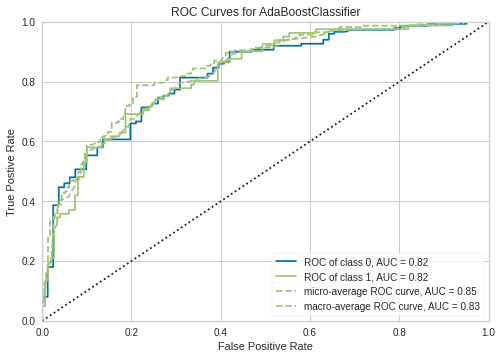

In [ ]:
# create a model
adaboost = create_model('ada')# AUC plot
plot_model(adaboost, plot = 'auc')# Decision Boundary

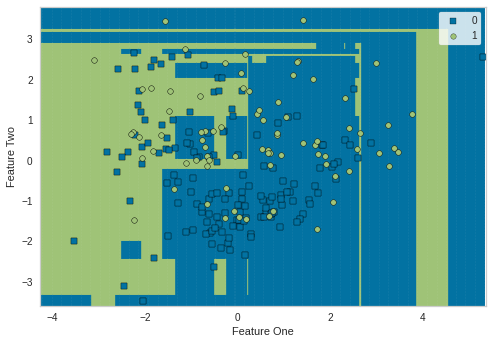

In [ ]:
plot_model(adaboost, plot = 'boundary')# Precision Recall Curve

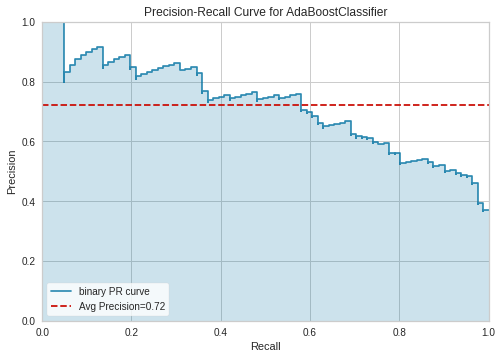

In [ ]:
plot_model(adaboost, plot = 'pr')# Validation Curve

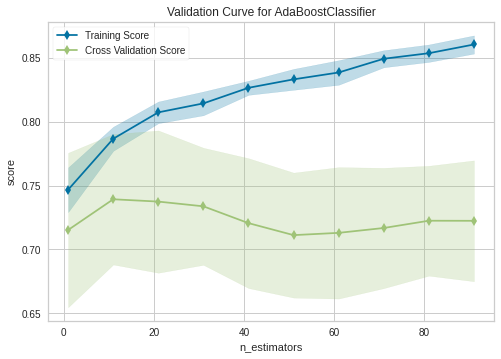

In [ ]:
plot_model(adaboost, plot = 'vc')

In [ ]:
evaluate_model(adaboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8812,0.6316,0.7500,0.6857,0.5367,0.5410
1,0.8519,0.9353,0.6842,0.8667,0.7647,0.6588,0.6686
2,0.8148,0.8241,0.7368,0.7368,0.7368,0.5940,0.5940
3,0.7407,0.7639,0.6316,0.6316,0.6316,0.4316,0.4316
4,0.8148,0.9023,0.5263,0.9091,0.6667,0.5507,0.5902
5,0.7407,0.7955,0.5789,0.6471,0.6111,0.4176,0.4190
6,0.7222,0.7429,0.6842,0.5909,0.6341,0.4122,0.4151
7,0.7547,0.7825,0.5556,0.6667,0.6061,0.4301,0.4339
8,0.6981,0.8159,0.4444,0.5714,0.5000,0.2886,0.2933
9,0.7170,0.7746,0.6111,0.5789,0.5946,0.3774,0.3778


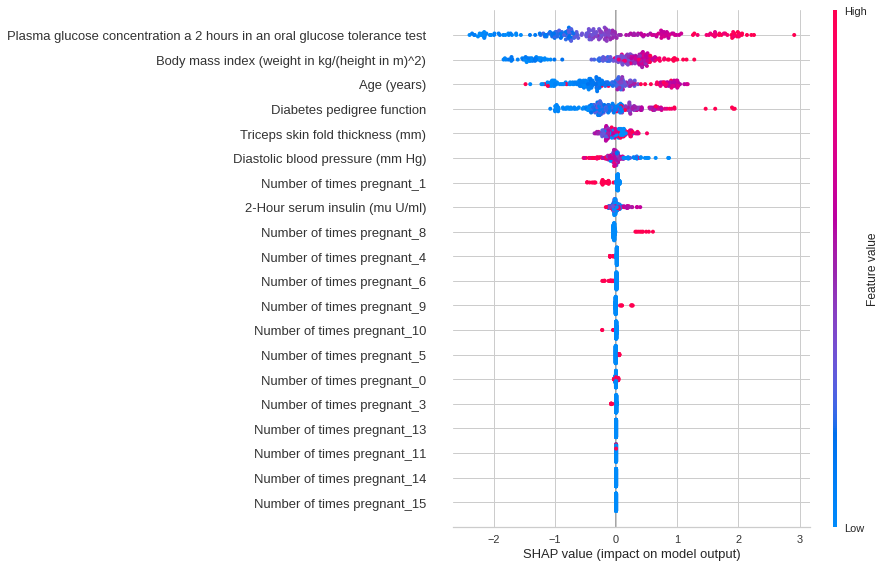

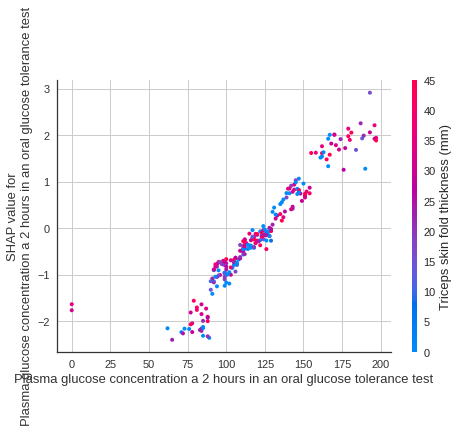

In [ ]:
# create a model
xgboost = create_model('xgboost')# summary plot
interpret_model(xgboost)# correlation plot
interpret_model(xgboost, plot = 'correlation')

In [ ]:
interpret_model(xgboost, plot = 'reason', observation = 0) 

In [ ]:
# create a model
rf = create_model('rf')# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8586,0.4737,0.8182,0.6000,0.4609,0.4939
1,0.7963,0.8985,0.4737,0.9000,0.6207,0.4992,0.5472
2,0.7222,0.6887,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.7407,0.7609,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.7778,0.7887,0.4211,0.8889,0.5714,0.4462,0.5029
5,0.7037,0.7150,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.6852,0.7504,0.5263,0.5556,0.5405,0.3014,0.3016
7,0.7358,0.7325,0.3889,0.7000,0.5000,0.3399,0.3670
8,0.7358,0.7857,0.4444,0.6667,0.5333,0.3592,0.3736
9,0.7547,0.7595,0.6111,0.6471,0.6286,0.4457,0.4461


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7403,0.7658,0.4938,0.678,0.5714,0.3916,0.4017


In [ ]:
predictions = predict_model(rf, data = diabetes)

In [ ]:
# creating model
adaboost = create_model('ada')# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8586,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.8148,0.9383,0.5789,0.8462,0.6875,0.5624,0.5828
2,0.6667,0.6925,0.5263,0.5263,0.5263,0.2692,0.2692
3,0.7037,0.7519,0.5789,0.5789,0.5789,0.3504,0.3504
4,0.6852,0.8256,0.4211,0.5714,0.4848,0.2656,0.2720
5,0.6852,0.7714,0.5263,0.5556,0.5405,0.3014,0.3016
6,0.7407,0.6782,0.6842,0.6190,0.6500,0.4449,0.4463
7,0.6604,0.7016,0.3889,0.5000,0.4375,0.1997,0.2029
8,0.6604,0.7095,0.3333,0.5000,0.4000,0.1762,0.1832
9,0.7170,0.7841,0.6667,0.5714,0.6154,0.3936,0.3965


Transformation Pipeline and Model Succesfully Saved


In [ ]:
# Importing dataset
from pycaret.datasets import get_data
boston = get_data('boston')
# Importing module and initializing setup
from pycaret.regression import *
reg1 = setup(data = boston, target = 'medv')
# compare models
compare_models()
# create a model
xgboost = create_model('xgboost')
# blend models
blend_models()


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0669,19.6205,4.4295,0.8378,0.1422,0.1229
1,3.1791,20.9849,4.5809,0.8239,0.2037,0.1668
2,2.4329,9.7723,3.1261,0.8634,0.1356,0.1095
3,2.5624,18.4669,4.2973,0.7727,0.1190,0.0872
4,3.4662,30.6850,5.5394,0.6692,0.2067,0.1484
5,3.0404,27.8708,5.2793,0.4625,0.1937,0.1377
6,2.6500,13.9607,3.7364,0.8581,0.1841,0.1438
7,2.3056,13.6498,3.6946,0.8555,0.1289,0.1044
8,2.5006,9.4299,3.0708,0.8594,0.1683,0.1528
9,2.6821,11.6820,3.4179,0.7457,0.1581,0.1326


VotingRegressor(estimators=[('Linear Regression_0',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            ('Lasso_1',
                             Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=3252, selection='cyclic',
                                   tol=0.0001, warm_start=False)),
                            ('Ridge_2',
                             Ridge(alpha=1.0, copy_X=Tru...
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
               

In [ ]:
#saving an experiment
save_experiment('experiment_1')

In [ ]:
experiment_saved = load_experiment('experiment_1')